## Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/insta-data-clean.xlsx')
df

,post identifier,organization,post URL,Post content,likes,comments,Post date,Follower count,Engagement rate,visual type,video views,likes/views,Leader in image,First image URL,Image objects,Image labels,Image text,Image faces,Image color
0,1,WBG,https://www.instagram.com/p/BxOkwTwl5GE/,PUBLICATION: A few reasons why the Pacific Isl...,1167.0,6,2019-05-09,386387.0,0.003036,Image,NaN,1167,No,https://scontent-cdg2-1.cdninstagram.com/vp/d2...,['Number of objects found: 0'],"['Labels: ', 'Sky 0.9890972375869751', 'Body o...","['Text, not found']","[' Faces, not found']",['Pixel_Fraction: 0.1987999975681305 \\ r: 13...
1,2,WBG,https://www.instagram.com/p/BxLaR1Ih3oR/,"With 6 million #solar panels, a new solar plan...",NaN,23,2019-05-08,386387.0,0.022094,Video,8514.0,8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,WBG,https://www.instagram.com/p/BxBtWOtjrVs/,"Millions of people in #Mozambique, #Malawi and...",1248.0,16,2019-05-04,383916.0,0.003292,Image,NaN,1248,No,https://scontent-cdg2-1.cdninstagram.com/vp/94...,"['Number of objects found: 6', 'Person (confid...","['Labels: ', 'Photograph 0.9653761982917786', ...","['Text, not found']",['Face:0) joy:VERY_UNLIKELY sorrow:VERY_UNLIKE...,['Pixel_Fraction: 0.05186666548252106 \\ r: 1...
3,4,WBG,https://www.instagram.com/p/Bw_HeZbn5o2/,What kind of #Data interests you? Tell us in t...,1870.0,38,2019-05-03,383916.0,0.004970,Image,NaN,1870,No,https://scontent-cdg2-1.cdninstagram.com/vp/a7...,"['Number of objects found: 1', 'Christmas tree...","['Labels: ', 'Text 0.8811547756195068', 'Pink ...",['Japan Population 1960 85+ 80 75 70 65 60 55 ...,"['Faces, not found']",['Pixel_Fraction: 0.16527898609638214 \\ r: 2...
4,5,WBG,https://www.instagram.com/p/Bw7XBLCg5c7/,CALLING ALL ARTISTS! This one's for you! 🎨🎵🎞️🖼...,1651.0,45,2019-05-01,382826.0,0.004430,Image,NaN,1651,No,https://scontent-cdg2-1.cdninstagram.com/vp/4c...,"['Number of objects found: 1', 'Woman (confide...","['Labels: ', 'Illustration 0.9222602248191833'...","['7 \\Text_Bounding_Box: [x: 508 y: 117 , x: 5...",['Face:0) joy:VERY_UNLIKELY sorrow:VERY_UNLIKE...,['Pixel_Fraction: 0.3873724341392517 \\ r: 24...
5,6,WBG,https://www.instagram.com/p/Bw5-ZGwgFRc/,Of the world’s 736 million extreme poor in 201...,4220.0,128,2019-05-01,382826.0,0.011358,Image,NaN,4220,No,https://scontent-cdg2-1.cdninstagram.com/vp/1b...,['Number of objects found: 0'],"['Labels: ', 'Diagram 0.9145868420600891', 'Te...","[""Half of the world's poor live in just 5 coun...","['Faces, not found']",['Pixel_Fraction: 0.09111879765987396 \\ r: 2...
6,7,WBG,https://www.instagram.com/p/Bw4nY-uH4rr/,When #Pakistan looks back in 2047 when it turn...,1125.0,8,2019-04-30,382826.0,0.002960,Image,NaN,1125,No,https://scontent-cdg2-1.cdninstagram.com/vp/b8...,"['Number of objects found: 4', 'Woman (confide...","['Labels: ', 'People 0.9414708614349365', 'Yel...","['Text, not found']",['Face:0) joy:VERY_UNLIKELY sorrow:VERY_UNLIKE...,['Pixel_Fraction: 0.1602666676044464 \\ r: 18...
7,8,WBG,https://www.instagram.com/p/Bwu567WBSCd/,"Watch in #VR 🎥 #Lack of adequate water supply,...",NaN,7,2019-04-26,381042.0,0.012999,Video,4946.0,4946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,WBG,https://www.instagram.com/p/Bwr1mHsFISM/,Plans and policies for #disability-inclusive e...,866.0,9,2019-04-25,381042.0,0.002296,Image,NaN,866,No,https://scontent-cdg2-1.cdninstagram.com/vp/96...,"['Number of objects found: 2', 'Person (confid...","['Labels: ', 'Room 0.7646538615226746', 'Child...","['Text, not found']",['Face:0) joy:POSSIBLE sorrow:VERY_UNLIKELY an...,['Pixel_Fraction: 0.09764918684959412 \\ r: 1...
9,10,WBG,https://www.instagram.com/p/BwqeabsBkIR/,Tag other #inspiring leaders like her in the c...,521.0,14,2019-04-25,381042.0,0.001404,Image,NaN,521,No,https://scontent-cdg2-1.cdninstagram.com/vp/af...,"['Number of objects found: 2', 'Woman (confide...","['Labels: ', 'Text 0.9157753586769104', 'Skin ...",['PYONE THET THET KYAW Founder of Vira Myanmar...,['Face:0) joy:VERY_LIKELY sorrow:VERY_UNLIKELY...,['Pixe

In [ ]:
from collections import defaultdict
collect = defaultdict(list)

check_index = index=df[df["Post content"].isna()]

check_record_for_none = index = df[df["Post content"].isna()]

if check_record_for_none.index > 0:
  print('NONE value present at location {}'.format(check_index.index))
  df.drop(index=df[df["Post content"].isna()].index,axis=0,inplace=True)


for record in df.iterrows():
  record = record[1]["Post content"]
  collect["Caption post"].append(df[df['Post content'] == record]["Post content"].get_values()[0])
  review = sentiment_analyzer_scores(record)
  #print(type(review))
  #print(sub.findall(review))
# print(review)
  collect["Negative"].append(review["neg"])
  collect["Neutral"].append(review["neu"])
  collect["Possitive"].append(review["pos"])
  collect["Overall Sentiment"].append(review["compound"])
  #break
new_col = pd.DataFrame(collect)
new_col


NONE value present at location Int64Index([495], dtype='int64')


,Caption post,Negative,Neutral,Possitive,Overall Sentiment
0,PUBLICATION: A few reasons why the Pacific Isl...,0.218,0.663,0.118,-0.7351
1,"With 6 million #solar panels, a new solar plan...",0.027,0.911,0.062,0.4404
2,"Millions of people in #Mozambique, #Malawi and...",0.127,0.823,0.050,-0.8519
3,What kind of #Data interests you? Tell us in t...,0.091,0.891,0.017,-0.8119
4,CALLING ALL ARTISTS! This one's for you! 🎨🎵🎞️🖼...,0.042,0.817,0.142,0.9182
5,Of the world’s 736 million extreme poor in 201...,0.146,0.801,0.053,-0.8481
6,When #Pakistan looks back in 2047 when it turn...,0.000,0.915,0.085,0.6705
7,"Watch in #VR 🎥 #Lack of adequate water supply,...",0.000,0.931,0.069,0.5423
8,Plans and policies for #disability-inclusive e...,0.000,0.907,0.093,0.5994
9,Tag other #inspiring leaders like her in the c...,0.000,0.819,0.181,0.8834


In [ ]:
import pprint

In [ ]:
from collections import defaultdict
collect = defaultdict(list)
for record in df.iterrows():
  record = record[1]["Post content"]
  a = df[df['Post content'] == record]["Post content"].get_values()[0]
  

In [ ]:
df[df["Post content"].isna()].index

Int64Index([495], dtype='int64')

In [ ]:
index=new[new["Post content"].isna()]
index

## 2nd Approach

In [ ]:
new = df[['Post content']].copy()
new.drop(index=new[new["Post content"].isna()].index,axis=0,inplace=True)
new.reset_index(inplace=True,drop =True)

In [ ]:
col = []
for i in range(len(new)):
  col.append(sentiment_analyzer_scores(new['Post content'][i]))

senti  =pd.DataFrame(col)
collect1  = pd.concat([new,senti], axis=1)
collect1

,Post content,compound,neg,neu,pos
0,PUBLICATION: A few reasons why the Pacific Isl...,-0.7351,0.218,0.663,0.118
1,"With 6 million #solar panels, a new solar plan...",0.4404,0.027,0.911,0.062
2,"Millions of people in #Mozambique, #Malawi and...",-0.8519,0.127,0.823,0.050
3,What kind of #Data interests you? Tell us in t...,-0.8119,0.091,0.891,0.017
4,CALLING ALL ARTISTS! This one's for you! 🎨🎵🎞️🖼...,0.9182,0.042,0.817,0.142
5,Of the world’s 736 million extreme poor in 201...,-0.8481,0.146,0.801,0.053
6,When #Pakistan looks back in 2047 when it turn...,0.6705,0.000,0.915,0.085
7,"Watch in #VR 🎥 #Lack of adequate water supply,...",0.5423,0.000,0.931,0.069
8,Plans and policies for #disability-inclusive e...,0.5994,0.000,0.907,0.093
9,Tag other #inspiring leaders like her in the c...,0.8834,0.000,0.819,0.181


In [ ]:
collect1.loc[:, collect1.columns != 'Post content'] *= 100

In [ ]:
collect1

,Post content,neg,neu,pos,compound
0,PUBLICATION: A few reasons why the Pacific Isl...,21.8,66.3,11.8,-73.51
1,"With 6 million #solar panels, a new solar plan...",2.7,91.1,6.2,44.04
2,"Millions of people in #Mozambique, #Malawi and...",12.7,82.3,5.0,-85.19
3,What kind of #Data interests you? Tell us in t...,9.1,89.1,1.7,-81.19
4,CALLING ALL ARTISTS! This one's for you! 🎨🎵🎞️🖼...,4.2,81.7,14.2,91.82
5,Of the world’s 736 million extreme poor in 201...,14.6,80.1,5.3,-84.81
6,When #Pakistan looks back in 2047 when it turn...,0.0,91.5,8.5,67.05
7,"Watch in #VR 🎥 #Lack of adequate water supply,...",0.0,93.1,6.9,54.23
8,Plans and policies for #disability-inclusive e...,0.0,90.7,9.3,59.94
9,Tag other #inspiring leaders like her in the c...,0.0,81.9,18.1,88.34


In [ ]:
cols = collect1.columns.to_list()
cols = ['Post content', 'neg', 'neu', 'pos','compound']
collect1 = collect1[cols]
collect1

## end of 2nd approach

In [ ]:
def hashtag_extract(x):
   
    return hashtags


In [ ]:
ht = re.findall(r"#(\w+)",df['Post content'][0])

In [ ]:
hashtags = []
  # Loop over the words in the tweet
for i in range(len(df)):
    hashtags.append(re.findall(r"#(\w+)", df['Post content'][i]))


In [ ]:
len(sum(hashtags,[]))

3895

In [ ]:
a = sum(hashtags,[])
type(a)

list

In [ ]:
from collections import Counter

counts = Counter(a)
print(counts)

Counter({'artofvisuals': 154, 'development': 119, 'EndPoverty': 102, 'globalgoals': 91, 'education': 90, 'investinpeople': 81, 'fotooftheday': 79, 'theweekoninstagram': 79, 'inspiration': 78, 'inspiring': 77, 'premiumposts': 77, 'phenomenalshot': 76, 'unitednations': 67, 'education4all': 62, 'educationmatters': 60, 'endpoverty': 33, 'water': 26, 'youth': 25, 'women': 24, 'inspire': 24, 'health': 22, 'climatechange': 21, 'OnePlanet': 21, 'EveryID': 20, 'inspirational': 20, 'jobs': 19, 'poverty': 19, 'mondaymotivation': 19, 'ParisAgreement': 19, 'Africa': 18, 'school': 17, 'WBGMeetings': 15, 'climate': 15, 'sustainable': 15, 'India': 15, 'schools': 15, 'refugees': 15, 'business': 15, 'GlobalGoals': 14, 'SDGs': 14, 'ClimateChange': 14, 'agriculture': 14, 'InclusionMatters': 14, 'learning': 14, 'sanitation': 13, 'WomensDay': 12, 'financialinclusion': 12, 'farmers': 12, 'ID4D': 12, 'everydayafrica': 12, 'Climate': 12, 'visualsgang': 12, 'InvestInPeople': 11, 'WomenBizLaw': 11, 'Indonesia': 

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [ ]:
import nltk
a1 = nltk.FreqDist(a) # IMP

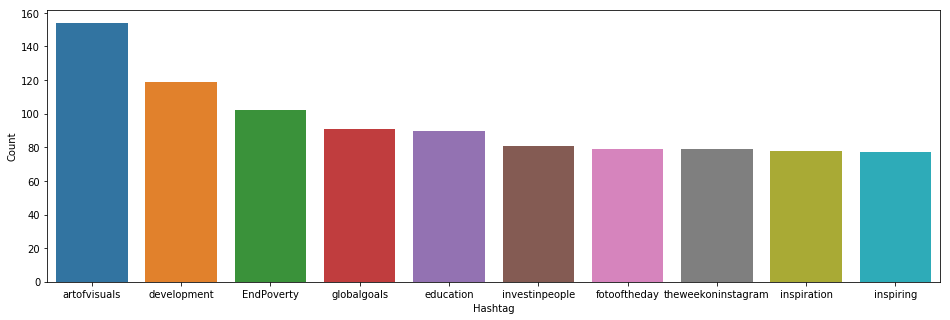

In [ ]:
import seaborn as sns
d = pd.DataFrame({'Hashtag': list(a1.keys()),
                  'Count': list(a1.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()